In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

#Part A:
An automobile parts manufacturing company has collected data on transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your data science skills to find the underlying buying patterns of the customers, provide the company with suitable insights about their customers, and recommend customized marketing strategies for different segments of customers.

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/KNIME/Sales_Data.xlsx")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,43282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,43337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,43401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
def utcconvertor(values):
  return pd.to_datetime((date(1899,12,30)+timedelta(values)).strftime("%Y-%m-%d"))
df['ORDERDATE']=df['ORDERDATE'].apply(utcconvertor)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [70]:
df.duplicated().sum()

0

In [72]:
df.to_excel("/content/drive/MyDrive/Colab Notebooks/KNIME/Sales_Data1.xlsx")

In [73]:
df.shape

(2747, 20)

In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.76,91.88,10100.00,10181.00,10264.00,10334.50,10425.00
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.09,819.28,42.00,1077.00,1761.00,2436.50,3562.00
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00


EDA

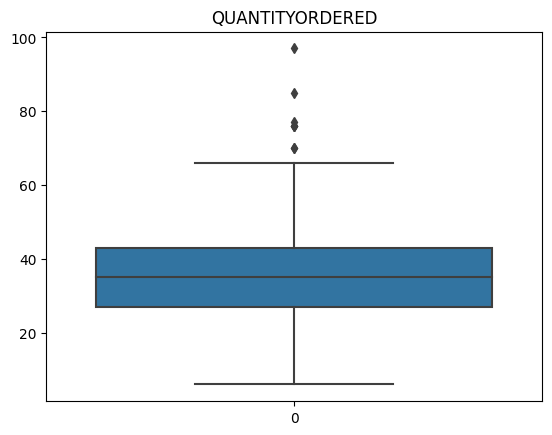

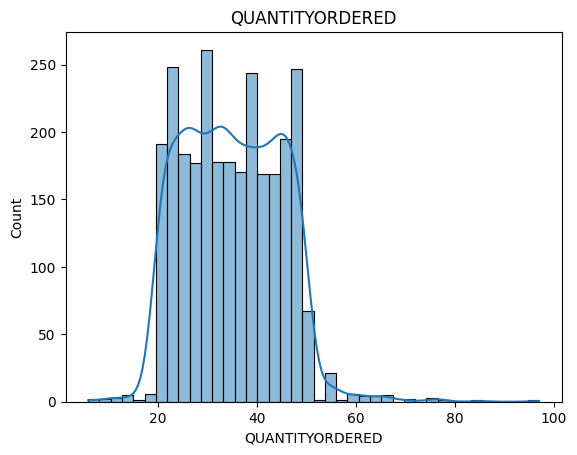

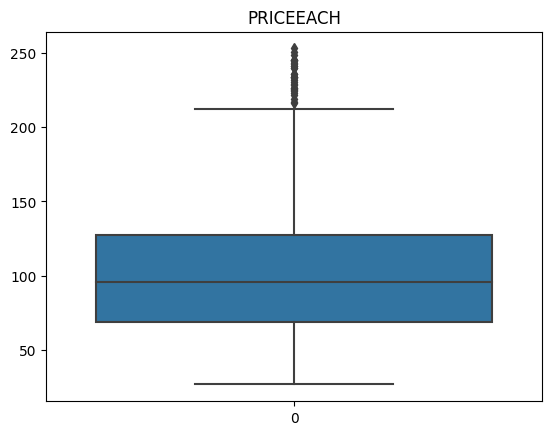

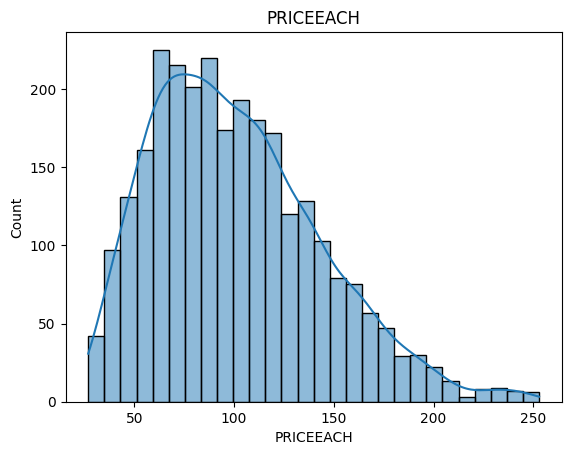

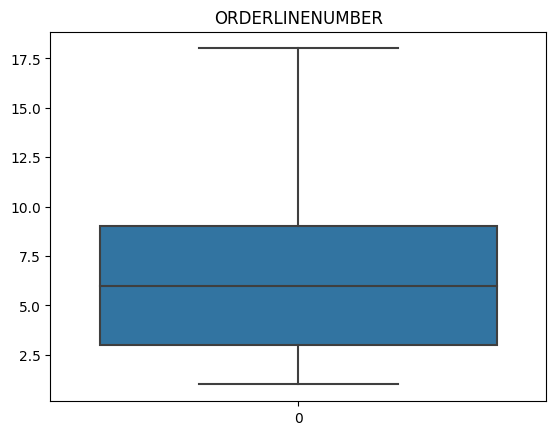

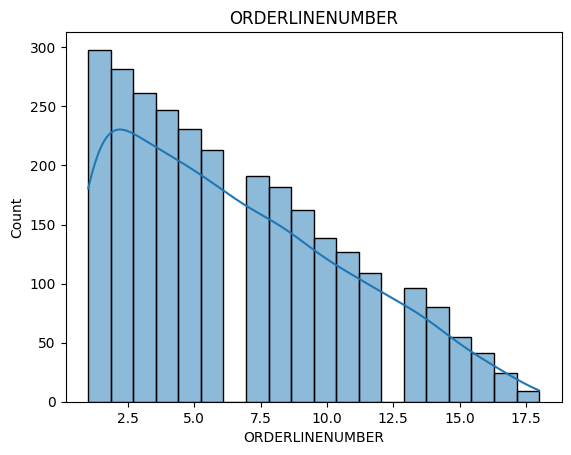

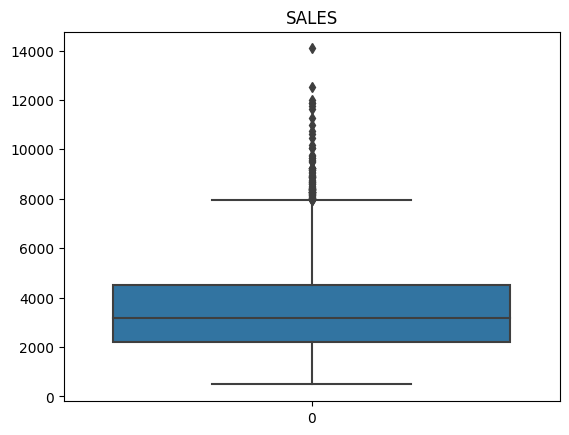

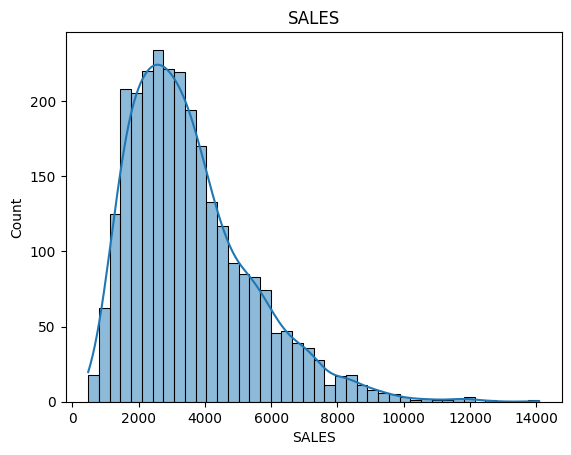

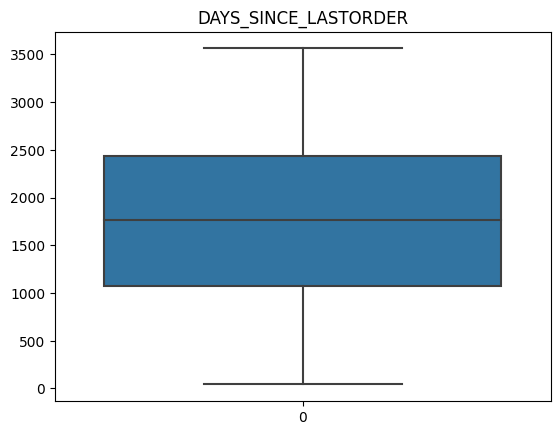

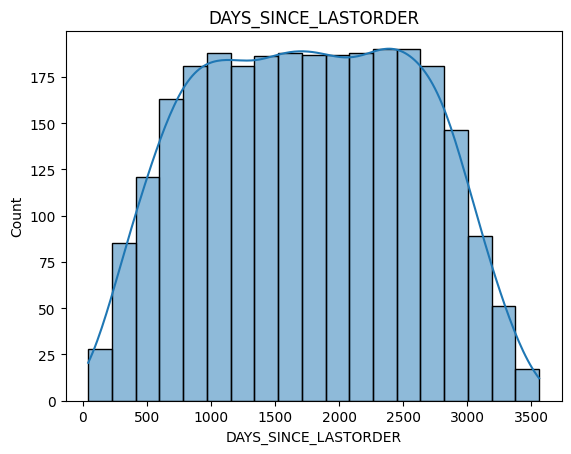

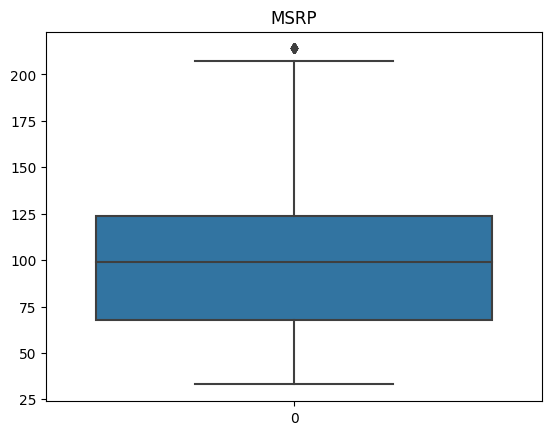

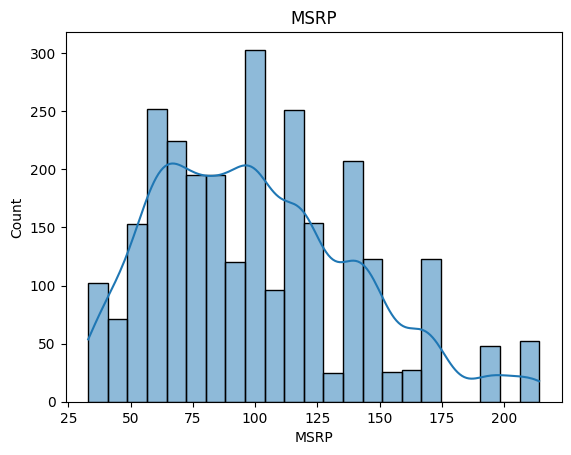

In [9]:
EDA_Columns = list(df.describe().columns)[1:]
for i in EDA_Columns:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()
  print(" ",end="\t")
  plt.title(i)
  sns.histplot(df[i],kde=True)
  plt.show()
  print("\n")



In [109]:
EDA_Columns

['QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'DAYS_SINCE_LASTORDER',
 'MSRP']

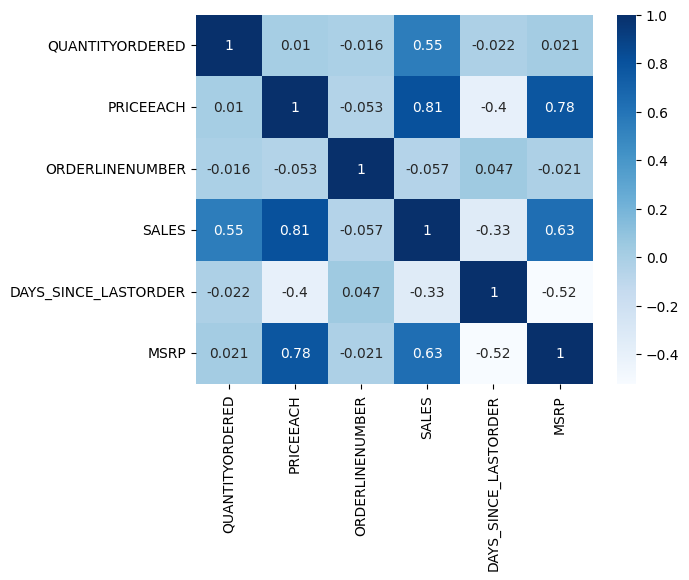

In [114]:
sns.heatmap(data=df[EDA_Columns].corr(),annot=True,cmap='Blues');

In [13]:
df[df.SALES>8000].DEALSIZE.value_counts()

Large    75
Name: DEALSIZE, dtype: int64

#Part B:
A grocery store shared the transactional data with you. Your job is to conduct a thorough analysis of Point of Sale (POS) data, identify the most commonly occurring sets of items in the customer orders, and provide recommendations through which a grocery store can increase its revenue by popular combo offers & discounts for customers.

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNIME/dataset_group.csv")
df.head()


,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [31]:
df.shape

(20641, 3)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [22]:
df.Order_id.duplicated().sum()

19502

In [25]:
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,20641,603,08-02-2019,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,20641.0,NaN,NaN,NaN,575.99,328.56,1.0,292.0,581.0,862.0,1139.0
Product,20641,37,poultry,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [ ]:
df.Product.value_counts()

<Axes: title={'center': 'Order_id'}>

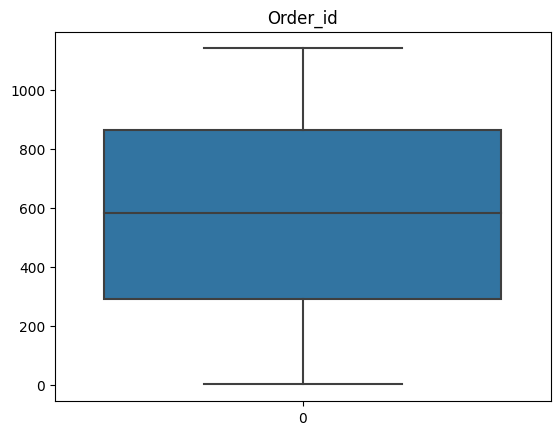

In [32]:
plt.title("Order_id")
sns.boxplot(df.Order_id)

<Axes: title={'center': 'Order_id'}, xlabel='Order_id', ylabel='Count'>

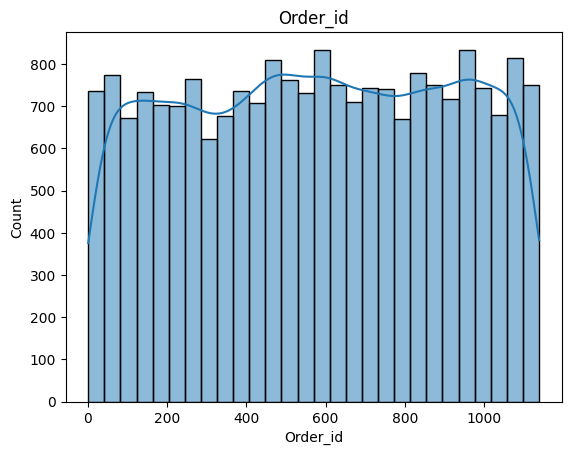

In [33]:
plt.title("Order_id")
sns.histplot(df.Order_id,kde=True)